In [1]:
import rasterio
from matplotlib import pyplot as plt
import numpy as np
import cv2
import random

Using TensorFlow backend.


In [2]:
test_image_bb = '/home/user/data/ilim_data_05/test_image/bounding_box/test_image_bb.tif'
mask_pred_trees = '/home/user/data/ilim_data_05/test_image/27/mask_pred_trees.tif'
mask_test_trees = '/home/user/data/ilim_data_05/test_image/27/trees.tif'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RasterioDeprecationWarning: Creation keywords stored on datasets by Rasterio versions < 1.0b1 will always be ignored in version 1.0. You may opt in to ignoring them now by setting RIO_IGNORE_CREATION_KWDS=TRUE in your environment.
  This is separate from the ipykernel package so we can avoid doing imports until


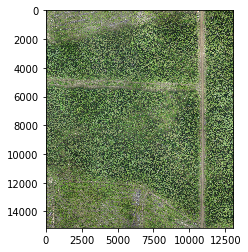

In [3]:
with rasterio.open(test_image_bb) as src:
    image_test = src.read().transpose(1, 2, 0)
    profile_test = src.profile
plt.imshow(image_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RasterioDeprecationWarning: Creation keywords stored on datasets by Rasterio versions < 1.0b1 will always be ignored in version 1.0. You may opt in to ignoring them now by setting RIO_IGNORE_CREATION_KWDS=TRUE in your environment.
  This is separate from the ipykernel package so we can avoid doing imports until


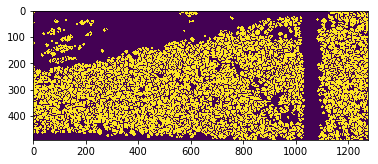

In [4]:
with rasterio.open(mask_test_trees) as src:
    mask = src.read()[0]
    profile = src.profile
plt.imshow(mask)

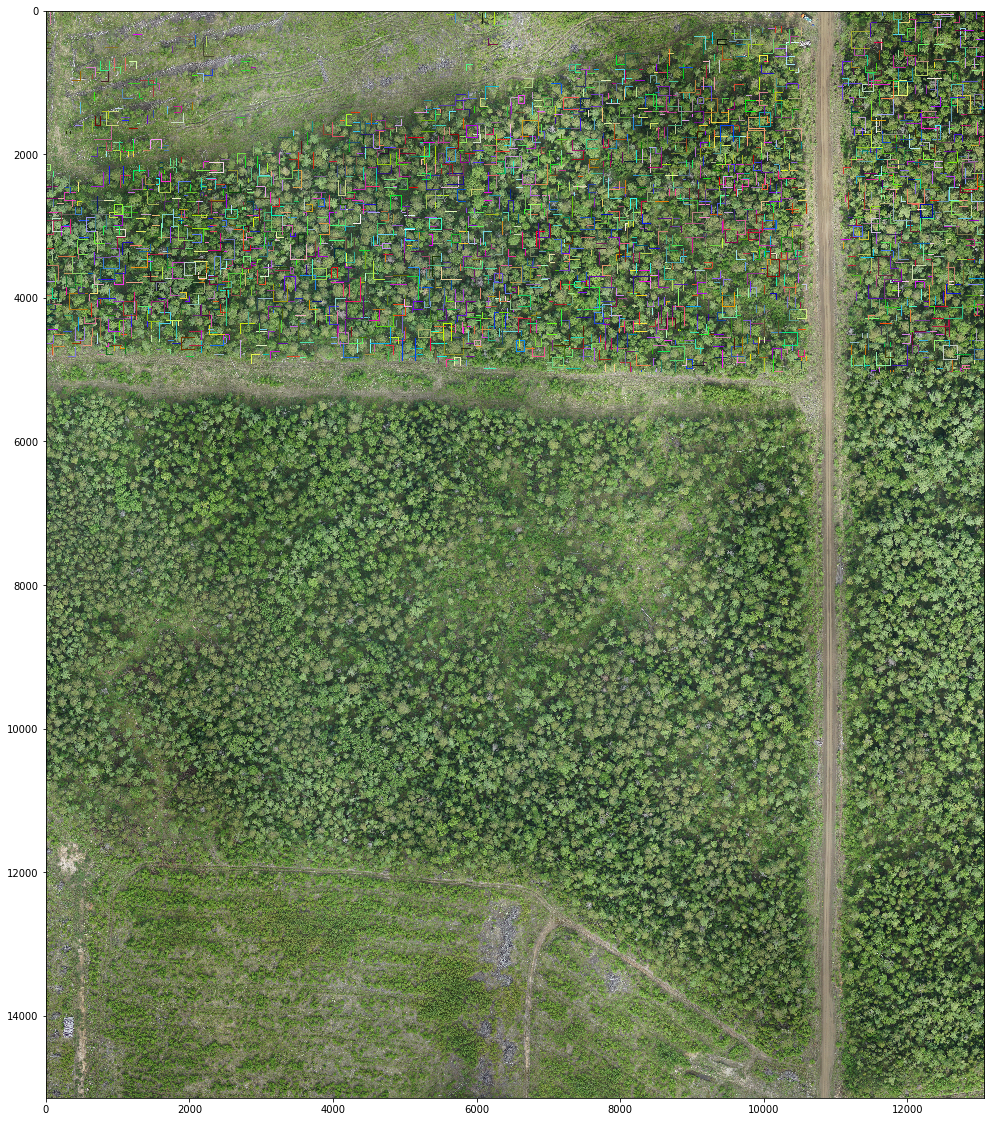

In [10]:
px_size1, px_size2 = profile['transform'][0]/profile_test['transform'][0], profile['transform'][4]/profile_test['transform'][4] 

_, w, e = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in w:
    rect = cv2.boundingRect(c)
#     x,y,w,h = rect
    x,y,w,h = np.round(rect[0]*px_size1).astype(np.uint16), np.round(rect[1]*px_size2).astype(np.uint16), np.round(rect[2]*px_size1).astype(np.uint16), np.round(rect[3]*px_size2).astype(np.uint16)
    image_test = np.ascontiguousarray(image_test, dtype=np.uint8)
    color = list(np.random.random(size=3) * 256)
    cv2.rectangle(image_test,(x,y),(x+w,y+h),color,3)
plt.figure(figsize=(20,20))
plt.imshow(image_test)


In [12]:
def image_save(output_path, img, img_name, profile):
    with rasterio.open(output_path + img_name + '.tif', 'w', **profile) as dst:
        dst.write(img)

In [13]:
image_save('/home/user/data/ilim_data_05/test_image/bounding_box/', image_test.transpose(2, 0, 1), 'test3', profile_test)